In [1]:
import sys
import os
sys.path.append(os.path.abspath("Pytorch/"))
sys.path.append(os.path.abspath("models/"))

In [2]:
from UncorrelatedFBSNNs import *
from CallOption import *

In [3]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import time

M = 128  # number of trajectories (batch size)
N = 200  # number of time snapshots
D = 1 # number of dimensions
Mm = N ** (1/5)

layers = [D + 1] + 4 * [256] + [1]

Xi = np.array([1.0] * D)[None, :]
T = 1.0

"Available architectures"
mode = "NAIS-Net"  # FC, Resnet and NAIS-Net are available
activation = "Sine"  # Sine and ReLU are available
model = CallOption(Xi, T, M, N, D, Mm, layers, mode, activation)

n_iter = 2 * 10 ** 4
lr = 1e-3

In [4]:
tot = time.time()
print(model.device)
graph = model.train(n_iter, lr)
print("total time:", time.time() - tot, "s")

cuda:0
It: 0, Loss: 1.124e+02, Y0: -0.881, Time: 0.40, Learning Rate: 1.000e-03
It: 100, Loss: 1.454e+01, Y0: 0.180, Time: 1.21, Learning Rate: 1.000e-03
It: 200, Loss: 1.123e+01, Y0: 0.208, Time: 1.22, Learning Rate: 1.000e-03
It: 300, Loss: 1.016e+01, Y0: 0.221, Time: 1.21, Learning Rate: 1.000e-03
It: 400, Loss: 9.163e+00, Y0: 0.183, Time: 1.28, Learning Rate: 1.000e-03
It: 500, Loss: 7.322e+00, Y0: 0.166, Time: 1.21, Learning Rate: 1.000e-03
It: 600, Loss: 5.720e+00, Y0: 0.221, Time: 1.19, Learning Rate: 1.000e-03
It: 700, Loss: 6.019e+00, Y0: 0.165, Time: 1.24, Learning Rate: 1.000e-03
It: 800, Loss: 6.331e+00, Y0: 0.211, Time: 1.23, Learning Rate: 1.000e-03
It: 900, Loss: 5.468e+00, Y0: 0.184, Time: 1.22, Learning Rate: 1.000e-03
It: 1000, Loss: 6.896e+00, Y0: 0.194, Time: 1.21, Learning Rate: 1.000e-03
It: 1100, Loss: 6.228e+00, Y0: 0.207, Time: 1.26, Learning Rate: 1.000e-03
It: 1200, Loss: 4.732e+00, Y0: 0.207, Time: 1.21, Learning Rate: 1.000e-03
It: 1300, Loss: 4.734e+00, Y0

In [25]:
t_test, W_test = model.fetch_minibatch()
X_pred, Y_pred = model.predict(Xi, t_test, W_test)

if type(t_test).__module__ != 'numpy':
    t_test = t_test.cpu().numpy()
if type(X_pred).__module__ != 'numpy':
    X_pred = X_pred.cpu().detach().numpy()
if type(Y_pred).__module__ != 'numpy':
    Y_pred = Y_pred.cpu().detach().numpy()

for i in range(63):
    t_test_i, W_test_i = model.fetch_minibatch()
    X_pred_i, Y_pred_i = model.predict(Xi, t_test_i, W_test_i)
    if type(X_pred_i).__module__ != 'numpy':
        X_pred_i = X_pred_i.cpu().detach().numpy()
    if type(Y_pred_i).__module__ != 'numpy':
        Y_pred_i = Y_pred_i.cpu().detach().numpy()
    X_pred = np.concatenate((X_pred, X_pred_i), axis=0)
    Y_pred = np.concatenate((Y_pred, Y_pred_i), axis=0)

if type(t_test).__module__ != 'numpy':
    t_test = t_test.cpu().numpy()
if type(X_pred).__module__ != 'numpy':
    X_pred = X_pred.cpu().detach().numpy()
if type(Y_pred).__module__ != 'numpy':
    Y_pred = Y_pred.cpu().detach().numpy()



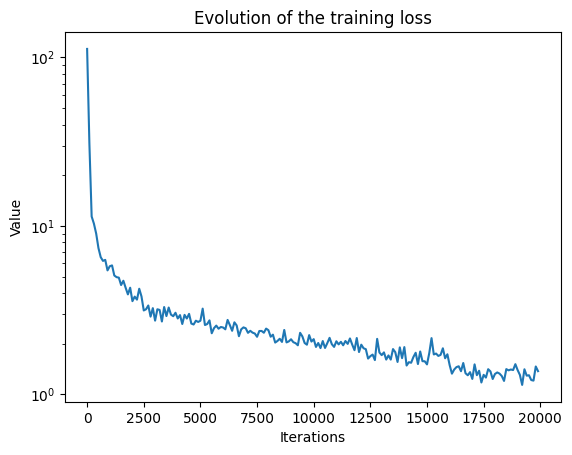

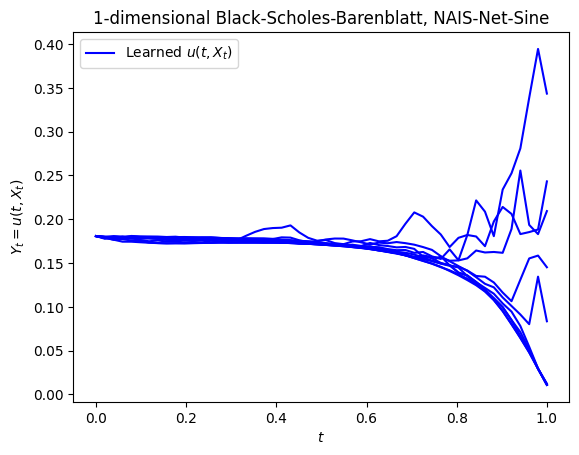

In [26]:
plt.figure()
plt.plot(graph[0], graph[1])
plt.xlabel('Iterations')
plt.ylabel('Value')
plt.yscale("log")
plt.title('Evolution of the training loss')
samples = 10
plt.figure()
plt.plot(t_test[0:1, :, 0].T, Y_pred[0:1, :, 0].T, 'b', label='Learned $u(t,X_t)$')

plt.plot(t_test[1:samples, :, 0].T, Y_pred[1:samples, :, 0].T, 'b')

plt.xlabel('$t$')
plt.ylabel('$Y_t = u(t,X_t)$')
plt.title(str(D) + '-dimensional Black-Scholes-Barenblatt, ' + model.mode + "-" + model.activation)
plt.legend()

plt.show()

In [7]:
Y_pred.shape

(6400, 52, 1)

In [8]:
r = 0.05

In [9]:
Y_preds = Y_pred.reshape(6400,52)

In [10]:
time_stamps = t_test[0].reshape(52,)
time_stamps

array([0.        , 0.01960784, 0.03921569, 0.05882353, 0.07843138,
       0.09803922, 0.11764706, 0.13725491, 0.15686275, 0.1764706 ,
       0.19607843, 0.21568628, 0.23529412, 0.25490198, 0.27450982,
       0.29411766, 0.3137255 , 0.33333334, 0.3529412 , 0.37254903,
       0.39215687, 0.4117647 , 0.43137255, 0.4509804 , 0.47058824,
       0.49019608, 0.50980395, 0.5294118 , 0.54901963, 0.5686275 ,
       0.5882353 , 0.60784316, 0.627451  , 0.64705884, 0.6666667 ,
       0.6862745 , 0.7058824 , 0.7254902 , 0.74509805, 0.7647059 ,
       0.78431374, 0.8039216 , 0.8235294 , 0.84313726, 0.8627451 ,
       0.88235295, 0.9019608 , 0.92156863, 0.9411765 , 0.9607843 ,
       0.98039216, 1.        ], dtype=float32)

In [11]:
epe = np.mean(np.exp(-r*time_stamps) * np.maximum(Y_preds,0),axis=0)    
epe

array([0.18078291, 0.17984007, 0.17898816, 0.1782524 , 0.1776202 ,
       0.17706862, 0.1765886 , 0.17611973, 0.1756982 , 0.17527992,
       0.17491056, 0.1745624 , 0.17424129, 0.17396568, 0.1736773 ,
       0.17344736, 0.17324065, 0.17306587, 0.17285101, 0.17270018,
       0.1725619 , 0.1723361 , 0.17224525, 0.17211296, 0.17205015,
       0.17186208, 0.17174278, 0.17154503, 0.17163622, 0.17155468,
       0.1715741 , 0.17178036, 0.1721139 , 0.17232566, 0.17289019,
       0.17319149, 0.1735608 , 0.17444615, 0.1751245 , 0.17592418,
       0.17642118, 0.17702764, 0.17815538, 0.17937034, 0.18068628,
       0.18173076, 0.1829172 , 0.18414515, 0.18484837, 0.18589374,
       0.18627076, 0.18783878], dtype=float32)

In [12]:
ene = np.mean(np.minimum(Y_preds,0),axis=0)
ene

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0.], dtype=float32)

In [13]:
from scipy.stats import multivariate_normal as normal

In [14]:
d1 = (np.log(1) + (0.05 + 0.5 * 0.4 ** 2) * (1 - 0) ) / (0.4 * np.sqrt(1 - 0))
d2 = (np.log(1) + (0.05 - 0.5 * 0.4 ** 2) * (1 - 0) ) / (0.4 * np.sqrt(1 - 0))

call = (1 * normal.cdf(d1, 0.0, 1.0) - 1 * np.exp(-0.05 * (1 - 0) ) * normal.cdf(d2, 0.0, 1.0))

In [15]:
call

0.18022951450216668

In [16]:
epe_exact = np.array([call for s in time_stamps[1:]])
ene_exact = np.array([0.0 for s in time_stamps[1:]])

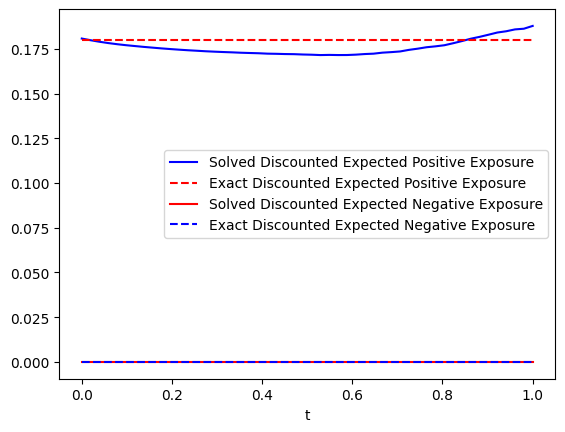

In [24]:
fig = plt.figure()
plt.plot(time_stamps,np.transpose(epe),'b',label='Solved Discounted Expected Positive Exposure' )
plt.plot(time_stamps,[call] + list(epe_exact),'r--',label='Exact Discounted Expected Positive Exposure')
plt.plot(time_stamps,np.transpose(ene),'r',label='Solved Discounted Expected Negative Exposure')
plt.plot(time_stamps,[0.0]+list(ene_exact),'b--',label='Exact Discounted Expected Negative Exposure')

plt.xlabel('t')
plt.legend()

plt.show()

In [27]:
model.save_model("models/CallOption.pth")